# Group 1 (Camile Harris, Mitch Gardner, Neil Sarkisian, Nicholas Ryan, Tushar Bhatkal)

## Problem Statement: As a graduate student at NYU Stern, I am looking to purchase wine. Wine is for classy individuals and I want to appear sophisticated to my new classmates. The problem is I never drink wine, and don't know where to start. Maybe if I find a wine dataset I can select out a "good" bottle and impress my friends. 

In [1]:
import pandas as pd
dataset= pd.read_csv("/home/tsb348/notebooks/winemag-data-130k-v2.csv", index_col=0)
dataset

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [2]:
#Add graphing abilities
import matplotlib.pyplot as plt
%matplotlib inline
#Add graphing with seaborn
import seaborn as sns
#For calculations
import numpy as np
#Add for word clouds
import matplotlib as mpl
#Add for word clouds
!sudo -H pip3 install -U wordcloud
from wordcloud import WordCloud, STOPWORDS

Requirement already up-to-date: wordcloud in /usr/local/lib/python3.6/dist-packages (1.5.0)
Requirement not upgraded as not directly required: pillow in /usr/local/lib/python3.6/dist-packages (from wordcloud) (5.1.0)
Requirement not upgraded as not directly required: numpy>=1.6.1 in /usr/local/lib/python3.6/dist-packages (from wordcloud) (1.14.4)
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#Add SQL
!sudo pip3 install -q -U sql_magic
from sqlalchemy import create_engine

The directory '/home/tsb348/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/tsb348/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#Add SQL
conn_string = 'mysql://{user}:{password}@{host}/?charset=utf8'.format(
    host = 'bigdata.stern.nyu.edu', 
    user = 'DealingF18GB1',
    password = 'DealingF18GB1!!',
    encoding = 'utf-8')
engine = create_engine(conn_string)


In [5]:
%reload_ext sql_magic
%config SQL.conn_name = 'engine'

In [6]:
%%read_sql
use DealingF18GB1
/*Use Team 1 DB*/

Query started at 05:31:38 AM UTC; Query executed in 0.01 m

# Lets take a look at this dataset

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Load in the dataframe
df = pd.read_csv("/home/tsb348/notebooks/winemag-data-130k-v2.csv", index_col=0)
# Looking at first 5 rows of the dataset
df.head()


print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



#### We backup this table in our bigdata server.

In [8]:
%%read_sql
drop table if exists wine_dataset;
CREATE TABLE wine_dataset (id int, country text, description text, designation text, points int, price decimal, province text, region_1 text, region_2 text, taster_name text, taster_twitter_handle text, title text, variety text, winery text)

Query started at 05:31:40 AM UTC; Query executed in 0.00 m

In [9]:
%%read_sql
load data local infile 'winemag-data-130k-v2.csv'
into table wine_dataset
columns terminated by ','
enclosed by '"'
lines terminated by '\n' ignore 1 lines (id, country, description, designation, points , price , province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery);

Query started at 05:31:40 AM UTC; Query executed in 0.06 m

In [10]:
%%read_sql
select * from wine_dataset limit 10
/*Check output of first rows*/
/*What happened here?*/

Query started at 05:31:44 AM UTC; Query executed in 0.00 m

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,0.0,Sicily & Sardinia,Etna,,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,,87,24.0,Alsace,Alsace,,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,,,Anna Lee C. Iijima,,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinh...,GewÃ¼rztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### How many different values can the 13 categories take on?

In [11]:
print('Number of Unique Values for Each Field in Dataset:')
print(dataset.nunique())

Number of Unique Values for Each Field in Dataset:
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64


In [12]:
print('Summary Statistics for All Dataset Fields:')
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries on Points and Price
country.describe()


Summary Statistics for All Dataset Fields:


points                                          \
                          count       mean       std   min    25%   50%   
country                                                                   
Argentina                3800.0  86.710263  3.179627  80.0  84.00  87.0   
Armenia                     2.0  87.500000  0.707107  87.0  87.25  87.5   
Australia                2329.0  88.580507  2.989900  80.0  87.00  89.0   
Austria                  3345.0  90.101345  2.499799  82.0  88.00  90.0   
Bosnia and Herzegovina      2.0  86.500000  2.121320  85.0  85.75  86.5   
Brazil                     52.0  84.673077  2.340782  80.0  83.00  85.0   
Bulgaria                  141.0  87.936170  2.077817  80.0  87.00  89.0   
Canada                    257.0  89.369650  2.384752  82.0  88.00  90.0   
Chile                    4472.0  86.493515  2.692959  80.0  85.00  86.0   
China                       1.0  89.000000       NaN  89.0  89.00  89.0   
Croatia                    73.0  87.219178  2.399344  81.0  86.00  88.0   
Cyprus                     11.0  87.181818  1.601136  85.0  86.00  87.0   
Czech Republic             12.0  87.250000  1.712255  84.0  86.50  88.0   
Egypt                       1.0  84.000000       NaN  84.0  84.00  84.0   
England                    74.0  91.581081  1.843216  89.0  90.00  91.0   
France                  22093.0  88.845109  3.044423  80.0  87.00  89.0   
Georgia                    86.0  87.686047  2.087845  82.0  87.00  88.0   
Germany                  2165.0  89.851732  2.469351  81.0  88.00  90.0   
Greece                    466.0  87.283262  2.185293  82.0  86.00  87.0   
Hungary                   146.0  89.191781  2.686659  81.0  88.00  89.0   
India                       9.0  90.222222  1.715938  87.0  90.00  90.0   
Israel                    505.0  88.471287  2.478412  80.0  87.00  89.0   
Italy                   19540.0  88.562231  2.649756  80.0  87.00  88.0   
Lebanon                    35.0  87.685714  2.784109  82.0  86.50  88.0   
Luxembourg                  6.0  88.666667  0.816497  88.0  88.00  88.5   
Macedonia                  12.0  86.833333  1.749459  84.0  85.75  87.0   
Mexico                     70.0  85.257143  2.722348  80.0  83.00  85.0   
Moldova                    59.0  87.203390  2.419601  82.0  86.00  88.0   
Morocco                    28.0  88.571429  1.687175  85.0  88.00  88.5   
New Zealand              1419.0  88.303030  2.435008  80.0  87.00  88.0   
Peru                       16.0  83.562500  1.860779  80.0  82.00  84.0   
Portugal                 5691.0  88.250220  2.996122  80.0  86.00  88.0   
Romania                   120.0  86.400000  1.716945  82.0  85.00  86.0   
Serbia                     12.0  87.500000  1.314257  86.0  86.00  87.5   
Slovakia                    1.0  87.000000       NaN  87.0  87.00  87.0   
Slovenia                   87.0  88.068966  1.730661  82.0  87.00  88.0   
South Africa             1401.0  88.056388  2.435826  82.0  86.00  88.0   
Spain                    6645.0  87.288337  3.066284  80.0  85.00  87.0   
Switzerland                 7.0  88.571429  2.507133  83.0  89.00  89.0   
Turkey                     90.0  88.088889  1.975379  84.0  87.00  88.0   
US                      54504.0  88.563720  3.114840  80.0  86.00  88.0   
Ukraine                    14.0  84.071429  1.591530  82.0  83.00  84.0   
Uruguay                   109.0  86.752294  2.687957  80.0  85.00  87.0   

                                        price                              \
                          75%    max    count       mean        std   min   
country                                                                     
Argentina               89.00   97.0   3756.0  24.510117  23.430122   4.0   
Armenia                 87.75   88.0      2.0  14.500000   0.707107  14.0   
Australia               91.00  100.0   2294.0  35.437663  49.049458   5.0   
Austria                 92.00   98.0   2799.0  30.762772  27.224797   7.0   
Bosnia and Herzegovina  87.25   88.

### The categories of points and price are discrete. It looks like the cheapest wine sells for 4 dollars and the most expensive 3300. We will let Professor White buy us the expensive bottle.

### Lets drill down deeper into each of the categories. What did we find?

In [13]:
print('Individual summaries for each field:')
#Do not have to include because aggregated above

Individual summaries for each field:


In [14]:
dataset.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [15]:
dataset.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [16]:
dataset.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

In [17]:
dataset.designation.describe()

count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

In [18]:
dataset.province.describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

In [19]:
dataset.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [20]:
dataset.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [21]:
dataset.winery.describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

In [22]:
dataset.title.describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

In [23]:
print('Top 20 Tasters')
dataset.taster_name.value_counts()

Top 20 Tasters


Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [24]:
print('Top 20 Wine Origin Countries')
dataset.country.value_counts().head(20)

Top 20 Wine Origin Countries


US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Hungary           146
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
Name: country, dtype: int64

In [25]:
print('Top 20 Wine Origin Regions')
dataset.province.value_counts().head(20)

Top 20 Wine Origin Regions


California            36247
Washington             8639
Bordeaux               5941
Tuscany                5897
Oregon                 5373
Burgundy               3980
Northern Spain         3851
Piedmont               3729
Mendoza Province       3264
Veneto                 2716
New York               2688
Alsace                 2440
Northeastern Italy     2138
Loire Valley           1856
Sicily & Sardinia      1797
Champagne              1613
Southwest France       1503
Southern Italy         1349
South Australia        1349
Provence               1346
Name: province, dtype: int64

In [26]:
print('Top 20 Wineries Reviewed')
dataset.winery.value_counts().head(20)

Top 20 Wineries Reviewed


Wines & Winemakers            222
Testarossa                    218
DFJ Vinhos                    215
Williams Selyem               211
Louis Latour                  199
Georges Duboeuf               196
Chateau Ste. Michelle         194
Concha y Toro                 164
Columbia Crest                159
Kendall-Jackson               130
Siduri                        126
Gary Farrell                  125
Lynmar                        118
Montes                        117
Albert Bichot                 117
Casa Santos Lima              113
Jean-Luc and Paul Aegerter    113
Undurraga                     113
Trapiche                      113
Santa Ema                     112
Name: winery, dtype: int64

In [27]:
print('Top 20 Varieties Reviewed')
dataset.variety.value_counts().head(20)

Top 20 Varieties Reviewed


Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
White Blend                  2360
Sparkling Blend              2153
Tempranillo                  1810
Rhône-style Red Blend        1471
Pinot Gris                   1455
Name: variety, dtype: int64

Which province has the most wine reviewed in Wine Mag?
Lets have a look at the top 20 provinces/states:


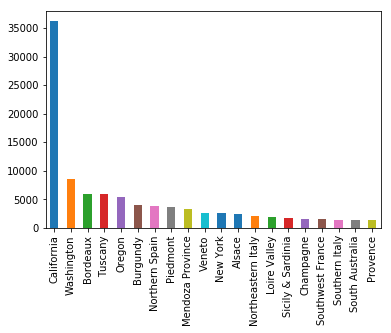

In [28]:
print('Which province has the most wine reviewed in Wine Mag?')
print('Let''s have a look at the top 20 provinces/states:')
dataset['province'].value_counts().head(20).plot.bar()

It looks like California dominates, but it would probably be more helpfult to compare what percent of wine reviews comes from each region


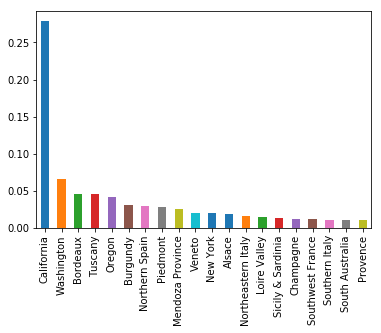

In [29]:
print('It looks like California dominates, but it would probably be more helpfult to compare what percent of wine reviews comes from each region')
(dataset['province'].value_counts().head(20) / len(dataset)).plot.bar()

How are wines typically rated?
Lets take a look at What range of scores Wine Mag gives out:


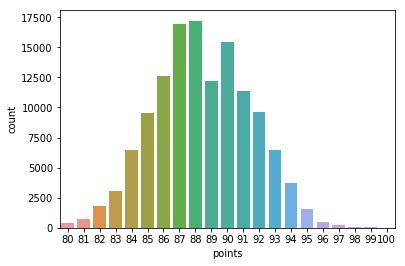

In [30]:
print('How are wines typically rated?')
print('Let''s take a look at What range of scores Wine Mag gives out:')
sns.countplot(dataset['points'])
# Could also produce the same graph with 
#dataset['points'].value_counts().sort_index().plot.bar()

It looks like ratings are close to a normal distribution
It might be better to take a look at multiple summaries at once.
Lets get a sense of the distribution of wine scores and prices as well as popular varieties and origins


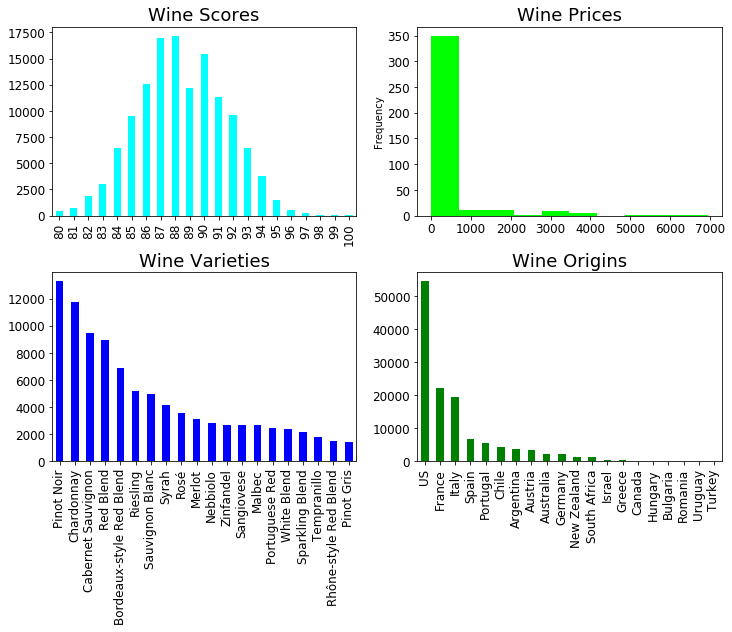

In [31]:
print ("It looks like ratings are close to a normal distribution")
print("It might be better to take a look at multiple summaries at once.")
print('Let''s get a sense of the distribution of wine scores and prices as well as popular varieties and origins')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

dataset['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='aqua'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

dataset['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='blue'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

dataset['country'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='green'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

dataset['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='lime'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

Is there correlation between the rating of the wine and its price?


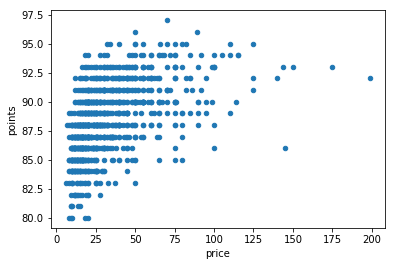

In [32]:
print('Is there correlation between the rating of the wine and its price?')
dataset[dataset['price'] < 200].sample(1000).plot.scatter(x='price', y='points')
#We are only comparing to prices under 200 because out histogram above shows that price is highly skewed.
#Random sample of 1000 points for more clarity.

It would seem that there exists a relationship between price and raitings. All bottles priced over $125 have ratings over 90. However $25 wine can rate as high as 95.0
Are there any patterns among our tasters?


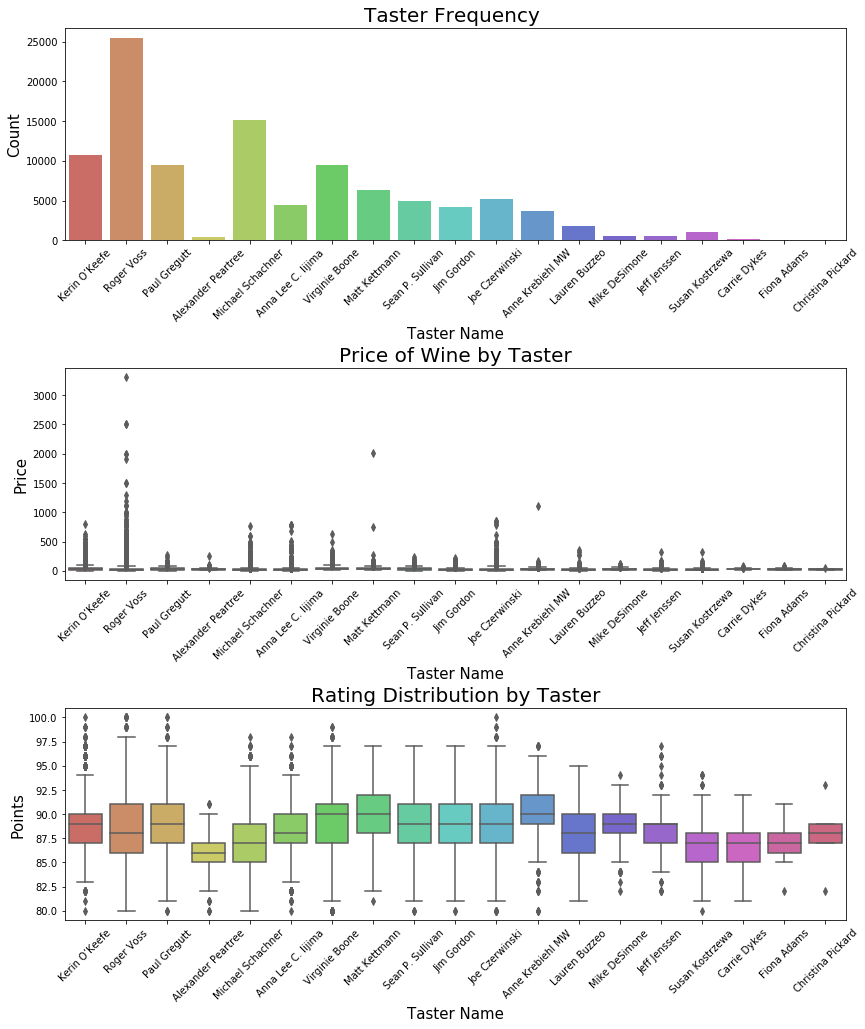

In [33]:
print ('It would seem that there exists a relationship between price and raitings. All bottles priced over $125 have ratings over 90. However $25 wine can rate as high as 95.0')
print('Are there any patterns among our tasters?')
plt.figure(figsize=(14,16))

provinces = dataset['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=dataset, palette='hls')
g.set_title("Taster Frequency ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='taster_name', data=dataset,
                 palette='hls')
g1.set_title("Price of Wine by Taster", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='taster_name',
                  data=dataset, palette='hls')
g2.set_title("Rating Distribution by Taster", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

We should take a look at how ratings are distributed across countries with at least 100 ratings:


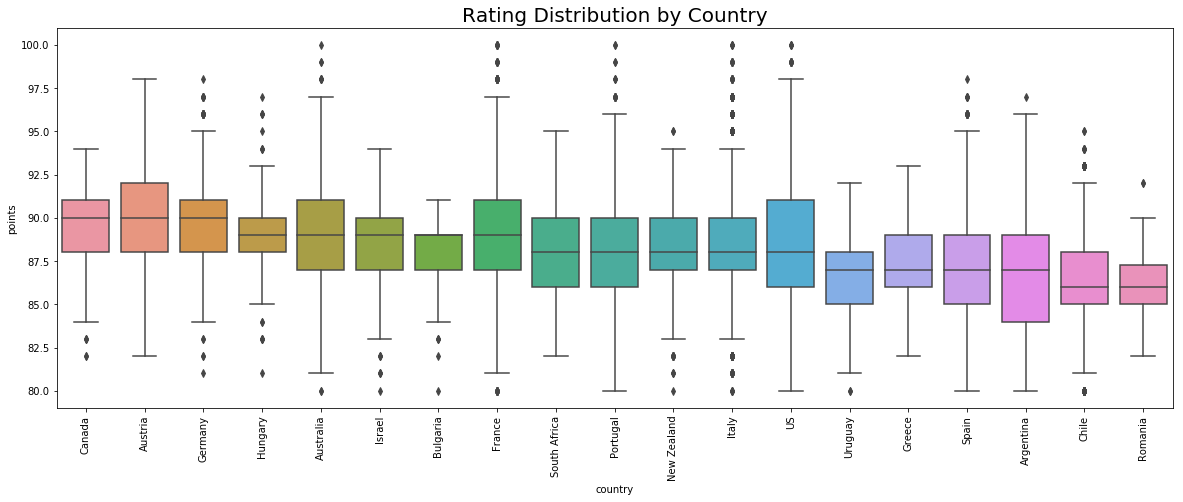

In [34]:
print('We should take a look at how ratings are distributed across countries with at least 100 ratings:')

country=dataset.groupby('country').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)
chart.set_title("Rating Distribution by Country", fontsize=20)
plt.show()

Canada and Austria have the highest median ratings. Should I buy a wine from either of those countries?
Lets do the same for regions with at least 1000 ratings:


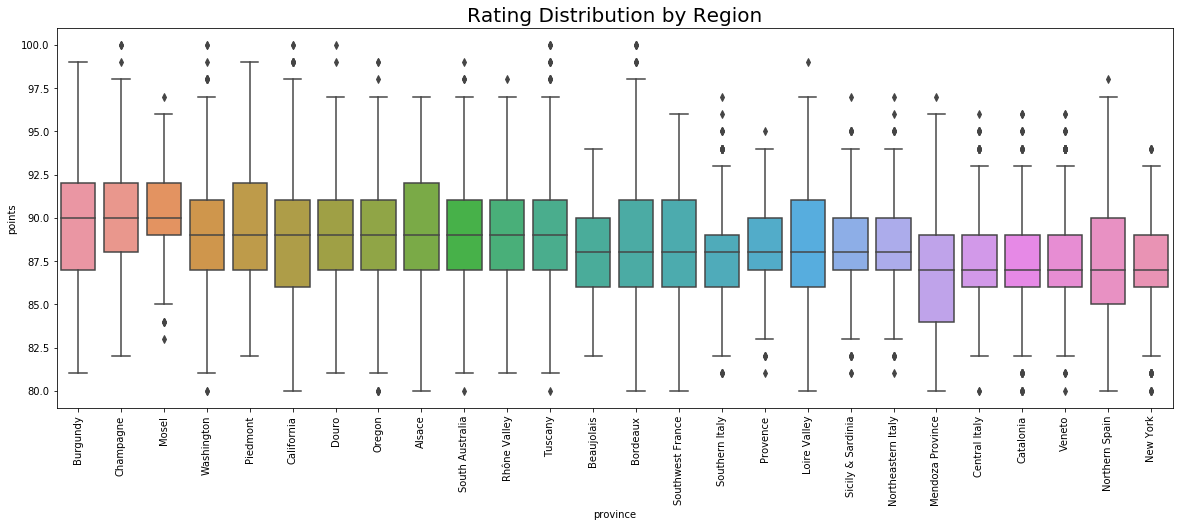

In [35]:
print ('Canada and Austria have the highest median ratings. Should I buy a wine from either of those countries?')
print('Let''s do the same for regions with at least 1000 ratings:')

country=dataset.groupby('province').filter(lambda x: len(x) >1000)
df2 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('province')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='province',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)
chart.set_title("Rating Distribution by Region", fontsize=20)
plt.show()

Lets also take a look at how ratings are distributed across varieties with at least 1000 ratings:


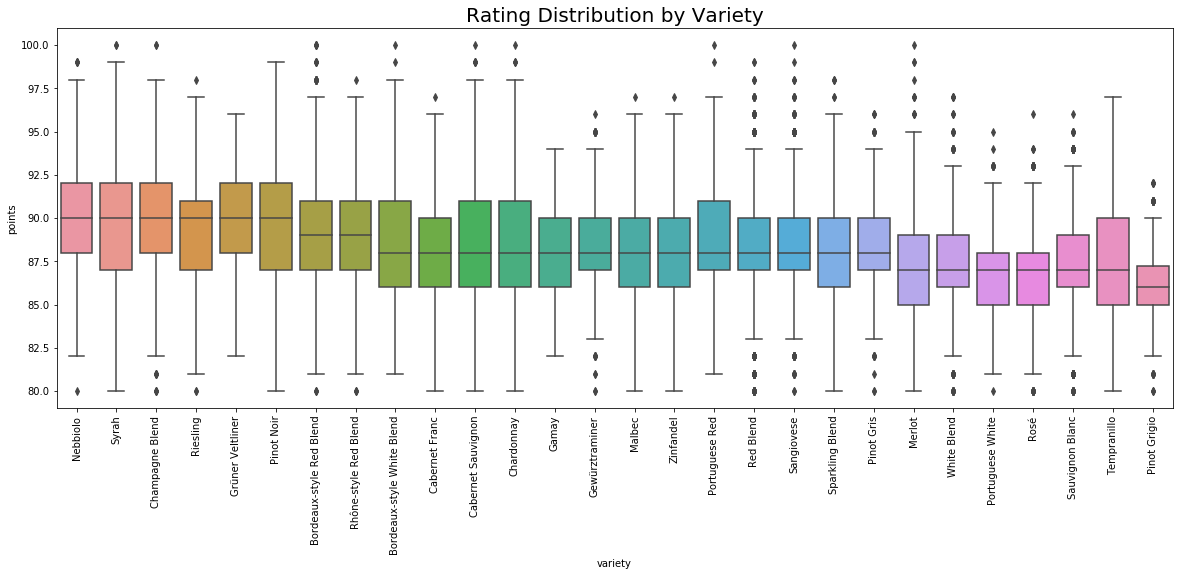

In [36]:
print('Let''s also take a look at how ratings are distributed across varieties with at least 1000 ratings:')

data = dataset.groupby('variety').filter(lambda x: len(x) >1000)

df4 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=data, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
chart.set_title("Rating Distribution by Variety", fontsize=20)
plt.show()

In [37]:
print ('Pinot Grigio has the lowest median rating. We arent buying a Pinot.')
print('Average prices and ratings for top 20 priced wine countries:')
countryavg=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
countryavg[['country','price','points']].head(n=20)

Pinot Grigio has the lowest median rating. We arent buying a Pinot.
Average prices and ratings for top 20 priced wine countries:


,country,price,points
35,Switzerland,107.800000,88.000000
11,England,51.681159,91.581081
19,Italy,46.222604,88.943975
12,France,42.903059,88.871363
14,Germany,42.608285,89.970165
37,US,37.486192,88.621830
6,Canada,33.971292,89.311321
18,Israel,32.657963,88.424623
16,Hungary,31.460000,88.440000
3,Austria,31.289370,90.312060


In [38]:
print('Average prices and ratings for top 20 rated wine countries:')
countryavg=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('points',ascending=False)
countryavg[['country','price','points']].head(n=20)

Average prices and ratings for top 20 rated wine countries:


,country,price,points
11,England,51.681159,91.581081
3,Austria,31.289370,90.312060
14,Germany,42.608285,89.970165
17,India,12.000000,89.500000
6,Canada,33.971292,89.311321
19,Italy,46.222604,88.943975
12,France,42.903059,88.871363
25,Morocco,18.000000,88.695652
37,US,37.486192,88.621830
16,Hungary,31.460000,88.440000


#### Is India a graduate students dream for cheap, good wine?

#### It might be easier to visualize


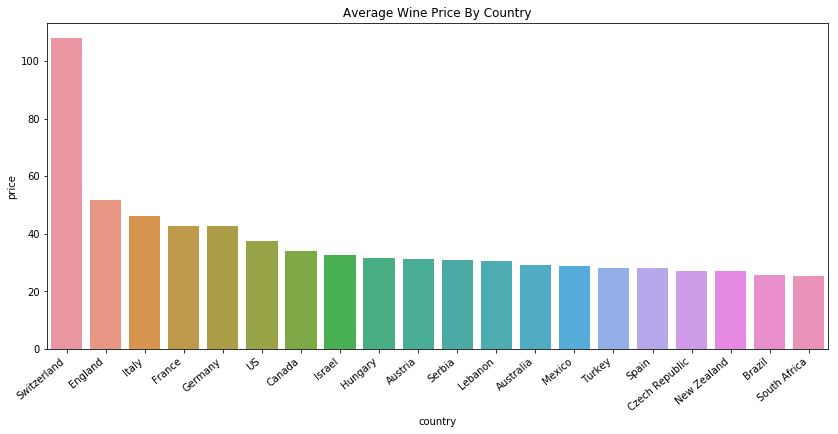

In [39]:

plt.figure(figsize = (14,6))
plt.title('Average Wine Price By Country')
graph=sns.barplot(x ="country", y="price", data=countryavg.sort_values('price',ascending=False).head(20))
locs, labels = plt.xticks()
graph.set_xticklabels(labels, rotation=40, ha="right")
plt.show()


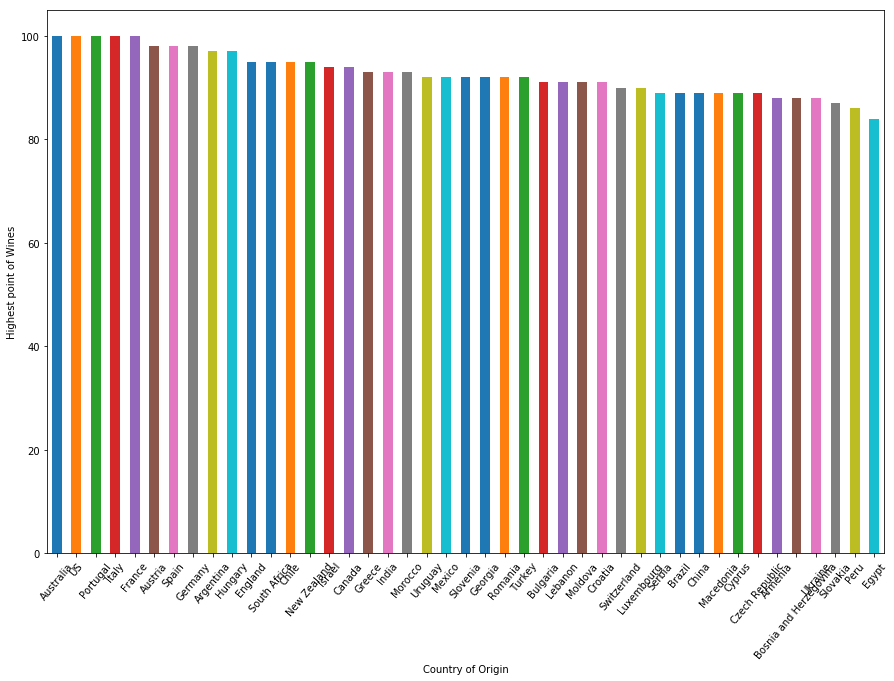

In [40]:
country = df.groupby("country")
plt.figure(figsize=(15,10))
country.max().sort_values("points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [41]:
print('But what country provides the best value based on price and rating?')
countryavg['value']=countryavg['points']/countryavg['price']
countryavg.sort_values('value', ascending=False)[['country','value']].head(20)

But what country provides the best value based on price and rating?


,country,value
38,Ukraine,9.063063
17,India,7.458333
13,Georgia,6.351931
5,Bulgaria,5.895065
1,Armenia,5.866667
9,Cyprus,5.704918
22,Macedonia,5.670330
29,Romania,5.437579
31,Slovakia,5.437500
25,Morocco,4.927536


Maybe Ukraine is the better option


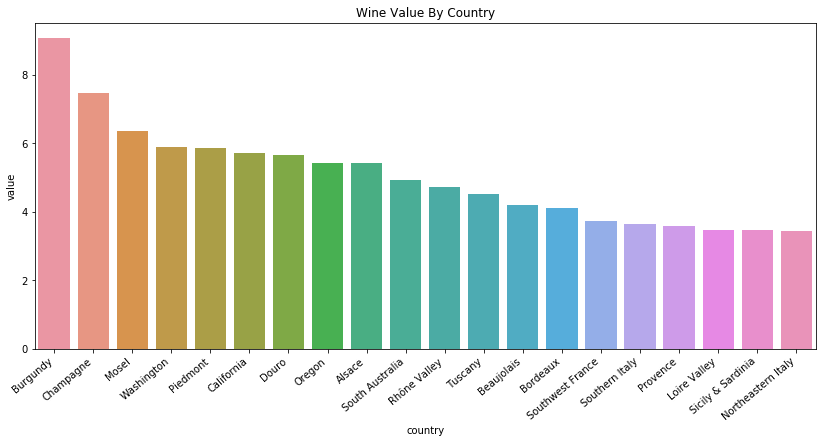

In [42]:
print('Maybe Ukraine is the better option')
plt.figure(figsize = (14,6))
plt.title('Wine Value By Country')
graph= sns.barplot(x = 'country', y="value", data=countryavg.sort_values('value',ascending=False).head(20))
locs, labels = plt.xticks()
graph.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

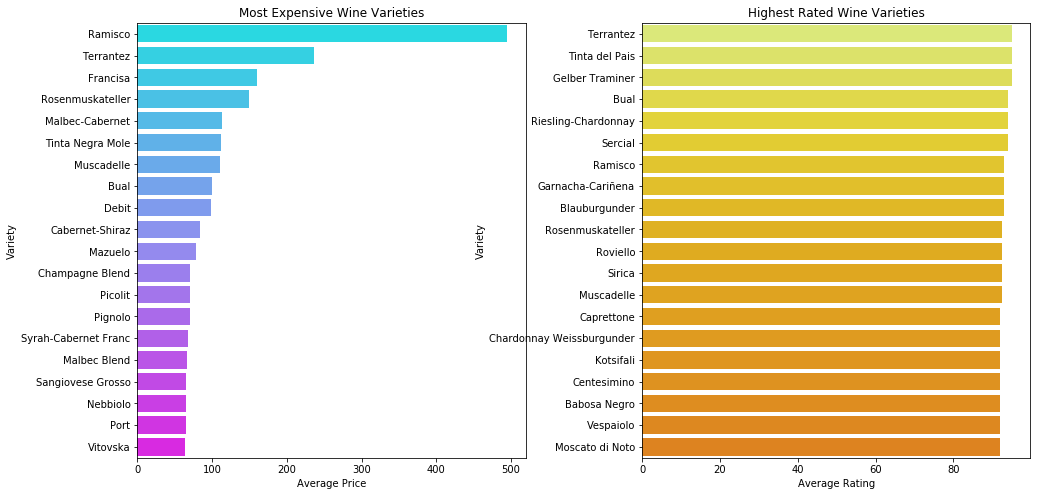

In [43]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = dataset.groupby(['variety'])['price'].mean().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Most Expensive Wine Varieties')
ax1.set_ylabel('Variety')
ax1.set_xlabel('Average Price')
cnt = dataset.groupby(['variety'])['points'].mean().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('Highest Rated Wine Varieties')
ax2.set_ylabel('Variety')
ax2.set_xlabel('Average Rating')
plt.subplots_adjust(wspace=0.3);

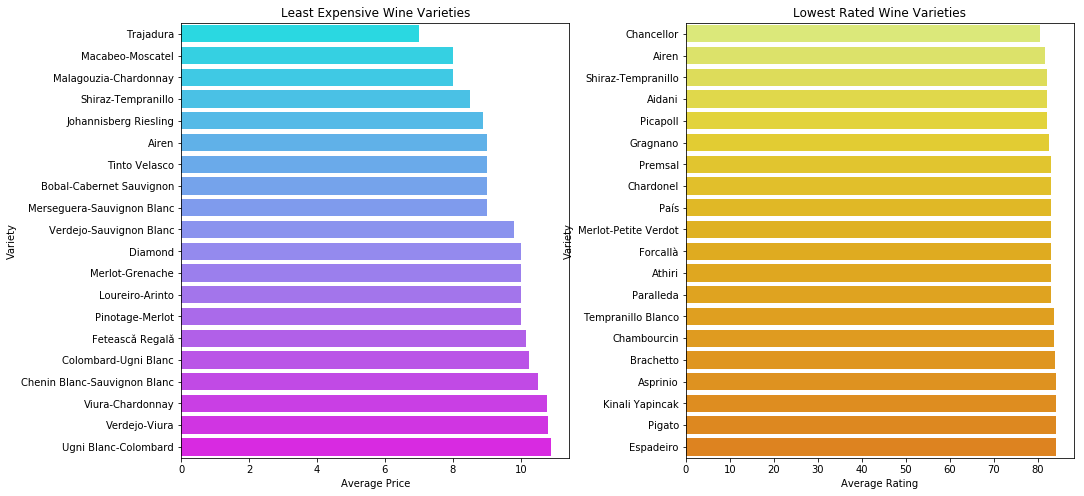

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax1, ax2 = ax.flatten()

cnt = dataset.groupby(
    ['variety'])['price'].mean().sort_values(ascending=True).to_frame()[:20]
sns.barplot(x=cnt['price'], y=cnt.index, palette='cool', ax=ax1)
ax1.set_title('Least Expensive Wine Varieties')
ax1.set_ylabel('Variety')
ax1.set_xlabel('Average Price')
cnt = dataset.groupby(
    ['variety'])['points'].mean().sort_values(ascending=True).to_frame()[:20]
sns.barplot(x=cnt['points'], y=cnt.index, palette='Wistia', ax=ax2)
ax2.set_title('Lowest Rated Wine Varieties')
ax2.set_ylabel('Variety')
ax2.set_xlabel('Average Rating')
plt.subplots_adjust(wspace=0.3)

What words are the 100 most commonly used to describe the wines reviewed?


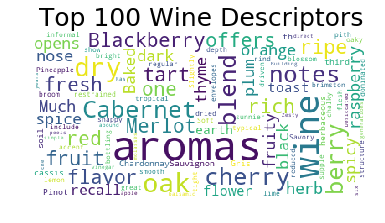

In [45]:
print('What words are the 100 most commonly used to describe the wines reviewed?')

stopwords = set(STOPWORDS)
data = dataset

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=50, 
                          random_state=False
                         ).generate(str(data['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Top 100 Wine Descriptors",fontsize=25)
plt.show()

## Lets look into TWITTER and see what we can find.

In [46]:
import pandas as pd
dataset1 = pd.read_csv("/home/tsb348/notebooks/winemag-data-130k-v2.csv", index_col=0)
dataset1

#dataset1 = dataset1.head(100)
print(dataset1)

            country                                        description  \
0             Italy  Aromas include tropical fruit, broom, brimston...   
1          Portugal  This is ripe and fruity, a wine that is smooth...   
2                US  Tart and snappy, the flavors of lime flesh and...   
3                US  Pineapple rind, lemon pith and orange blossom ...   
4                US  Much like the regular bottling from 2012, this...   
5             Spain  Blackberry and raspberry aromas show a typical...   
6             Italy  Here's a bright, informal red that opens with ...   
7            France  This dry and restrained wine offers spice in p...   
8           Germany  Savory dried thyme notes accent sunnier flavor...   
9            France  This has great depth of flavor with its fresh ...   
10               US  Soft, supple plum envelopes an oaky structure ...   
11           France  This is a dry wine, very spicy, with a tight, ...   
12               US  Slightly reduced,

In [47]:
uniqueHandles = dataset1['taster_twitter_handle'].copy()

In [48]:
#uniqueHandles.columns = ['handle_name']
##followers[].nunique()
twitter_accounts = uniqueHandles.value_counts(dropna = True).sort_index()
twitter_accounts.reset_index(level=0)
#twitter_accounts['twitter_handle'] = twitter_accounts.index
print(twitter_accounts)

@AnneInVino          3685
@JoeCz               5147
@bkfiona               27
@gordone_cellars     4177
@kerinokeefe        10776
@laurbuzz            1835
@mattkettmann        6332
@paulgwine           9532
@suskostrzewa        1085
@vboone              9537
@vossroger          25514
@wawinereport        4966
@wineschach         15134
@winewchristina         6
@worldwineguys       1005
Name: taster_twitter_handle, dtype: int64


In [49]:
!pip install requests 

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
import requests 
import math
import numpy as np
import time



data = []

In [51]:
for i,v in twitter_accounts.items():
    url = "https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=" + i[1:]
    print(url)
    response = requests.get(url)
    print(response)
    content = response.json()
    if not content:
        print("Empty list")
    else:
        data.append([i,v,content[0]['followers_count']])
    
df = pd.DataFrame(data)

https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=AnneInVino
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=JoeCz
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=bkfiona
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=gordone_cellars
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=kerinokeefe
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=laurbuzz
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=mattkettmann
<Response [200]>
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=paulgwine 
<Response [200]>
Empty list
https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=suskostrzewa
<Response [200]>
https://cdn.syndication.twimg.com/w

In [52]:
df.columns = ['Twitter_handle', 'No_of_Reviews', 'No_of_followers']
print(df)

      Twitter_handle  No_of_Reviews  No_of_followers
0        @AnneInVino           3685             6019
1             @JoeCz           5147             4630
2           @bkfiona             27              227
3   @gordone_cellars           4177              958
4       @kerinokeefe          10776             5939
5          @laurbuzz           1835             1884
6      @mattkettmann           6332             2467
7      @suskostrzewa           1085             1855
8            @vboone           9537             2191
9         @vossroger          25514              952
10     @wawinereport           4966            10297
11       @wineschach          15134             1379
12   @winewchristina              6             3721
13    @worldwineguys           1005             2593


<Figure size 1080x720 with 0 Axes>

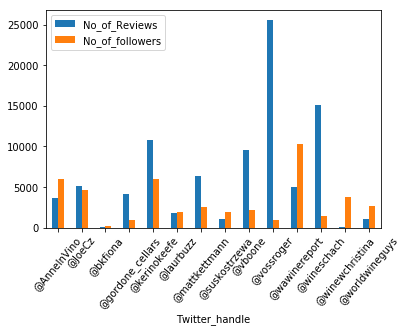

In [53]:
#df.plot.line('Twitter_handle')
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.plot.bar('Twitter_handle')
plt.xticks(rotation=50)
#plt.xlabel("Twitter Handle")
plt.show()

### Reviews and followers do not seem to be correlated.

In [54]:
#add twitter handle name 
#response = requests.get("https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names=paulgwine")
#content = response.json()
#followers = content[0]['followers_count']
#fol = content
#print(followers)

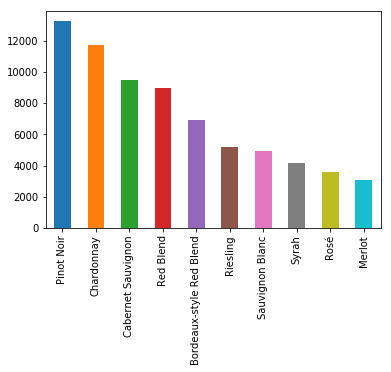

In [55]:
#wine variety with the higest reviews
count = dataset1['variety'].value_counts().head(10)

count.plot.bar()

### Twitter users review Red Blends and Pinot Noir's the most.